# Experimenting with Text to Image Generation

In this notebook, we'll experiment with generative AI using a text-to-image model called stable diffusion.  We'll be using an open source [model](https://huggingface.co/runwayml/stable-diffusion-v1-5) from [Huggingface](huggingface.co)

## Setup

### Check GPU

While we can run these notebooks without a GPU, it'll be much faster with one.  Let's check to make sure we have a GPU and how much memory we have available.

In [1]:
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

NVIDIA A10G, 23028 MiB, 22502 MiB


### Install Libraries

We need some libraries to run the diffusion pipeline.  The most important is the [Huggingface Diffusers library](https://huggingface.co/docs/diffusers/index).

In [2]:
!pip install -r requirements.txt

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-_nsdhusm
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-_nsdhusm
  Resolved https://github.com/huggingface/diffusers to commit 42cae93b942ec904ead46c26c42be24422adc92c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 48.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 267.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 190.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 MB 5.8 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 MB 148.2 MB/s eta 0:00:0000:0100

In [3]:
!pip list | grep -E "boto|grpcio|pandas|torch|torchvision|diffusers|transformers|accelerate|flash-attn|ftfy|xformers|protobuf"

accelerate                0.28.0
boto3                     1.34.89
botocore                  1.34.89
codeflare-torchx          0.6.0.dev2
diffusers                 0.29.0.dev0
flash-attn                2.5.9.post1
ftfy                      6.2.0
grpcio                    1.64.0
grpcio-tools              1.64.0
pandas                    2.2.2
protobuf                  5.27.0
torch                     2.2.2+cu121
torchvision               0.17.2+cu121
transformers              4.39.3
xformers                  0.0.25.post1

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


### Load the Pre-Trained Model

We can load a pre-trained model directly from Huggingface.  Here we're specifying [runwayml/stable-diffusion-v1-5](runwayml/stable-diffusion-v1-5), but we could also have used any number of models including [stabilityai/stable-diffusion-2-1](https://huggingface.co/stabilityai/stable-diffusion-2-1) or [CompVis/stable-diffusion-v1-4](https://huggingface.co/CompVis/stable-diffusion-v1-4)

[model](https://huggingface.co/runwayml/stable-diffusion-v1-5)

```
DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
```

In [4]:
import torch
from diffusers import DiffusionPipeline

# load the model from Huggingface https://huggingface.co/runwayml/stable-diffusion-v1-5
pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
# pipeline = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1")

# You could also load local weights:
# pipeline = DiffusionPipeline.from_pretrained("./notebook-output/stable_diffusion_weights/redhat-dog")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pipeline.to(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.29.0.dev0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

## Sample Inference

### A Dog

  0%|          | 0/50 [00:00<?, ?it/s]

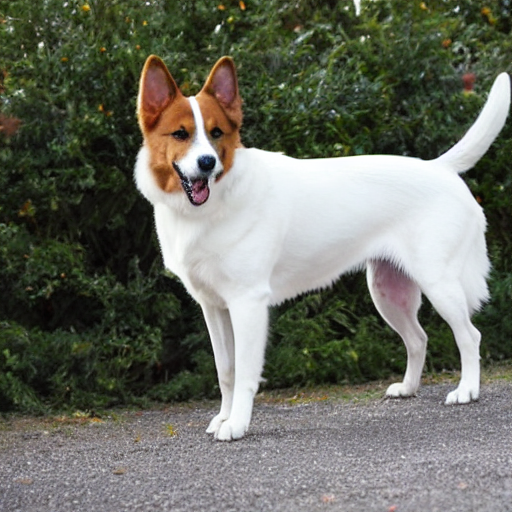

In [5]:
image = pipeline("a photo of a dog",
                 negative_prompt="ugly, deformed, bad anatomy").images[0]
image

### Not My Dog

So, I know of a specific dog I want to generate pictures of.

This is my `rhteddy` dog:

![redhat dog](https://rhods-public.s3.amazonaws.com/sample-data/images/redhat-dog-small.jpg)

Let's try and generate a picture of Red Hat Teddy.

  0%|          | 0/50 [00:00<?, ?it/s]

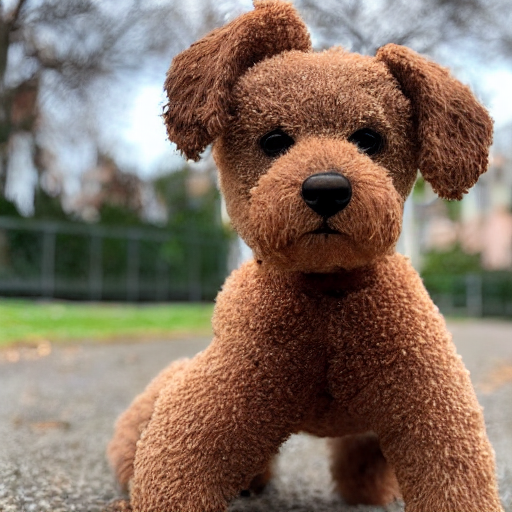

In [6]:
image = pipeline("a photo of a rhteddy dog").images[0]
image

### My Dog

As you can tell, we generated a picture, but it wasn't my dog.

The word `rhteddy`, means nothing to the model, or to you, either.  In order to teach the model about Teddy, I'll have to fine tune it

[Notebook 2 - Fine Tuning](2_fine_tuning_custom.ipynb)
